In [1]:
# All imports
import urllib.request
import zipfile
import pandas as pd
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score


# Downloading and loading the dataset

In [2]:

# Download the dataset : Commented out as the dataset is already downloaded
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank-additional.zip"
filename = "data/bank-additional.zip"
urllib.request.urlretrieve(url, filename)


('data/bank-additional.zip', <http.client.HTTPMessage at 0x1235874a0>)

In [3]:
# Unzip the file: Commented out as the dataset is already downloaded
with zipfile.ZipFile(filename,'r') as zip_ref:
    zip_ref.extractall("./data/")


In [4]:
# Load the dataset
data = pd.read_csv("data/bank-additional/bank-additional-full.csv", sep=";")
# Print a sample of the dataset
print("First few rows of the dataset:")
print(data.head())
# Print feature names
print("\nFeatures in the dataset:")
print(data.columns.tolist())
# Display basic information about the dataset
print("\nDataset info:")
print(data.info())

First few rows of the dataset:
   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.c

In [5]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Data Preprocessing

In [6]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [7]:
data['y'].value_counts()

y
no     36548
yes     4640
Name: count, dtype: int64

In [8]:
# categorical columns: job, marital, education, default, housing, loan, contact, month, day_of_week, poutcome

# encode the categorical columns using one-hot encoding

df = pd.get_dummies(data, columns=['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y'], drop_first=True)
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False


In [9]:
df.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,False,False,False,True,False,False,False,True,False,False


In [10]:
df['y_yes'].value_counts()

y_yes
False    36548
True      4640
Name: count, dtype: int64

In [11]:
X = df.drop(columns=['y_yes'])
y = df['y_yes']


# Feature Engineering

## Feature Selection

In [12]:
df  = pd.concat([X, y], axis=1)

In [13]:
df['y_yes'].value_counts()

y_yes
False    36548
True      4640
Name: count, dtype: int64

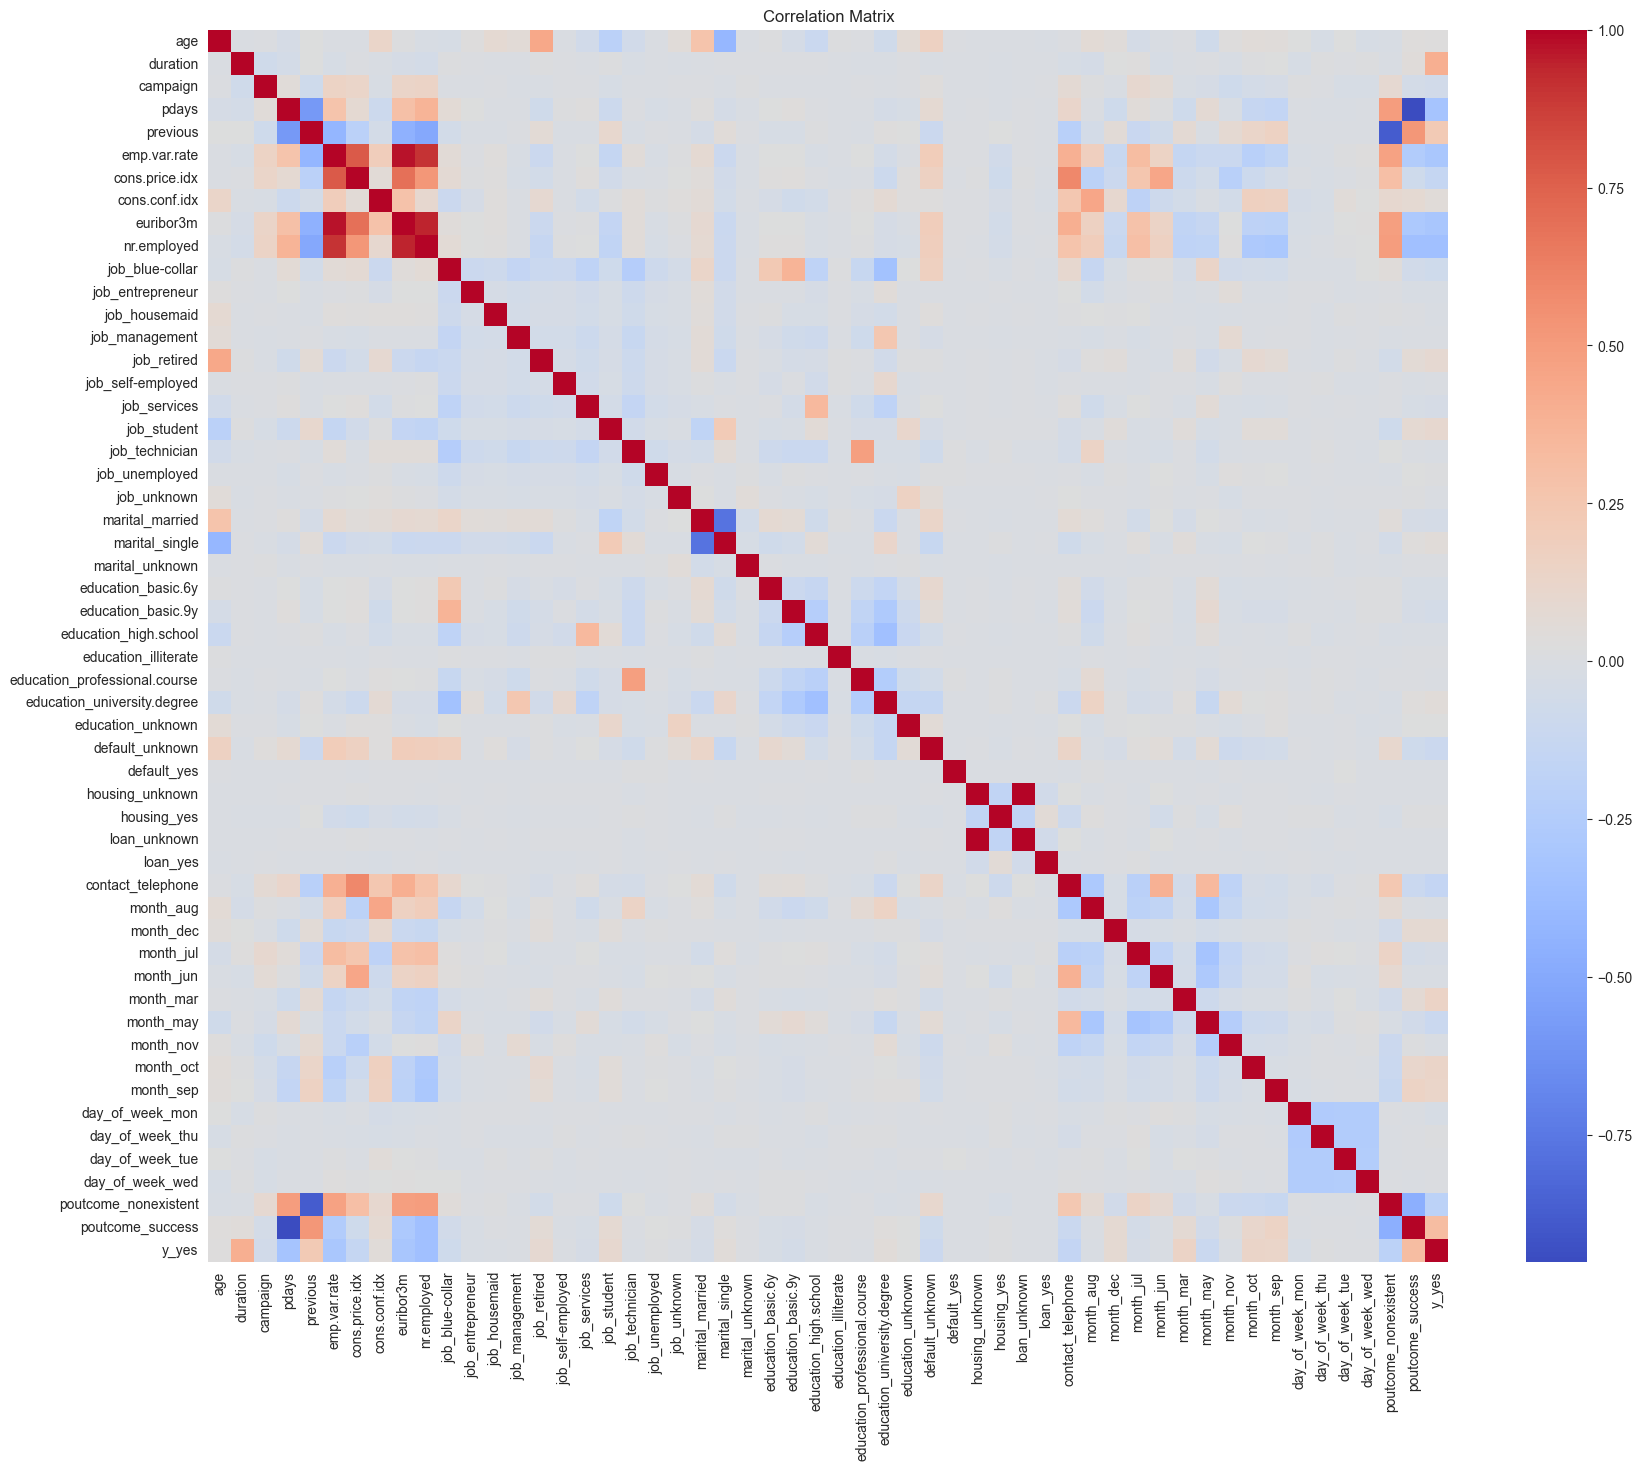

In [14]:
correlation_matrix = df.corr()
plt.figure(figsize=(20, 16))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 

In [15]:
# get the highest correlated features with each other
corrrelation_values = correlation_matrix.abs().unstack()


corrrelation_values = corrrelation_values.reset_index()
corrrelation_values.columns = ['feature1', 'feature2', 'correlation']
corrrelation_values = corrrelation_values[corrrelation_values['feature1'] != corrrelation_values['feature2']]
# comvert from scientific notation to float
corrrelation_values['correlation'] = corrrelation_values['correlation'].astype(float)
corrrelation_values['positive_correlation'] = corrrelation_values['correlation'].abs()

# get the top 10 correlated features
corrrelation_values = corrrelation_values.sort_values(by='positive_correlation', ascending=False)
corrrelation_values = corrrelation_values[corrrelation_values['positive_correlation'] > 0.85]


corrrelation_values

,feature1,feature2,correlation,positive_correlation
1817,housing_unknown,loan_unknown,1.000000,1.000000
1923,loan_unknown,housing_unknown,1.000000,1.000000
437,euribor3m,emp.var.rate,0.972245,0.972245
278,emp.var.rate,euribor3m,0.972245,0.972245
214,pdays,poutcome_success,0.950700,0.950700
2811,poutcome_success,pdays,0.950700,0.950700
494,nr.employed,euribor3m,0.945154,0.945154
441,euribor3m,nr.employed,0.945154,0.945154
279,emp.var.rate,nr.employed,0.906970,0.906970
491,nr.employed,emp.var.rate,0.906970,0.906970


In [16]:
drop_features = ['housing_unknown', 'pdays', 'emp.var.rate', 'nr.employed', 'previous']

df.drop(columns=drop_features, inplace=True)

In [17]:
target_corr = correlation_matrix['y_yes'].sort_values(ascending=False)

target_corr.drop(index='y_yes', inplace=True)
target_corr.drop(index=drop_features, inplace=True)
print(target_corr)

duration                         0.405274
poutcome_success                 0.316269
month_mar                        0.144014
month_oct                        0.137366
month_sep                        0.126067
job_student                      0.093955
job_retired                      0.092221
month_dec                        0.079303
cons.conf.idx                    0.054878
marital_single                   0.054133
education_university.degree      0.050364
age                              0.030399
education_unknown                0.021430
job_unemployed                   0.014752
day_of_week_thu                  0.013888
housing_yes                      0.011743
day_of_week_tue                  0.008046
education_illiterate             0.007246
day_of_week_wed                  0.006302
marital_unknown                  0.005211
education_professional.course    0.001003
job_unknown                     -0.000151
job_management                  -0.000419
loan_unknown                    -0

In [18]:
target_corr = target_corr.abs()
print(target_corr.describe())


count    48.000000
mean      0.064247
std       0.088347
min       0.000151
25%       0.007401
50%       0.026958
75%       0.092654
max       0.405274
Name: y_yes, dtype: float64


In [19]:
selected_features = target_corr[target_corr > 0.02].index.tolist()
print(len(selected_features))

27


In [20]:
removed_features = target_corr[target_corr <= 0.02].index.tolist()
print(removed_features)

['job_unemployed', 'day_of_week_thu', 'housing_yes', 'day_of_week_tue', 'education_illiterate', 'day_of_week_wed', 'marital_unknown', 'education_professional.course', 'job_unknown', 'job_management', 'loan_unknown', 'default_yes', 'loan_yes', 'job_self-employed', 'job_technician', 'job_housemaid', 'education_high.school', 'month_aug', 'month_jun', 'month_nov', 'job_entrepreneur']


In [21]:
X_selected = df[selected_features]
X_selected

,duration,poutcome_success,month_mar,month_oct,month_sep,job_student,job_retired,month_dec,cons.conf.idx,marital_single,...,marital_married,education_basic.9y,campaign,job_blue-collar,default_unknown,month_may,cons.price.idx,contact_telephone,poutcome_nonexistent,euribor3m
0,261,False,False,False,False,False,False,False,-36.4,False,...,True,False,1,False,False,True,93.994,True,True,4.857
1,149,False,False,False,False,False,False,False,-36.4,False,...,True,False,1,False,True,True,93.994,True,True,4.857
2,226,False,False,False,False,False,False,False,-36.4,False,...,True,False,1,False,False,True,93.994,True,True,4.857
3,151,False,False,False,False,False,False,False,-36.4,False,...,True,False,1,False,False,True,93.994,True,True,4.857
4,307,False,False,False,False,False,False,False,-36.4,False,...,True,False,1,False,False,True,93.994,True,True,4.857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,334,False,False,False,False,False,True,False,-50.8,False,...,True,False,1,False,False,False,94.767,False,True,1.028
41184,383,False,False,False,False,False,False,False,-50.8,False,...,True,False,1,True,False,False,94.767,False,True,1.028
41185,189,False,False,False,False,False,True,False,-50.8,False,...,True,False,2,False,False,False,94.767,False,True,1.028
41186,442,False,False,False,False,False,False,False,-50.8,False,...,True,False,1,False,False,False,94.767,False,True,1.028


In [22]:
X, y = X_selected, df['y_yes']

In [23]:
# perform stratified split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(y_train.value_counts())
print(y_test.value_counts())

y_yes
False    29238
True      3712
Name: count, dtype: int64
y_yes
False    7310
True      928
Name: count, dtype: int64


In [24]:
numerical_features = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
numerical_features = [feature for feature in numerical_features if feature in selected_features]
numerical_features

['age', 'duration', 'campaign', 'cons.price.idx', 'cons.conf.idx', 'euribor3m']

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



In [26]:
# perform SMOTE
smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)
print(y_resampled.value_counts())
X_train, y_train = X_resampled, y_resampled


y_yes
False    29238
True     29238
Name: count, dtype: int64


## PCA

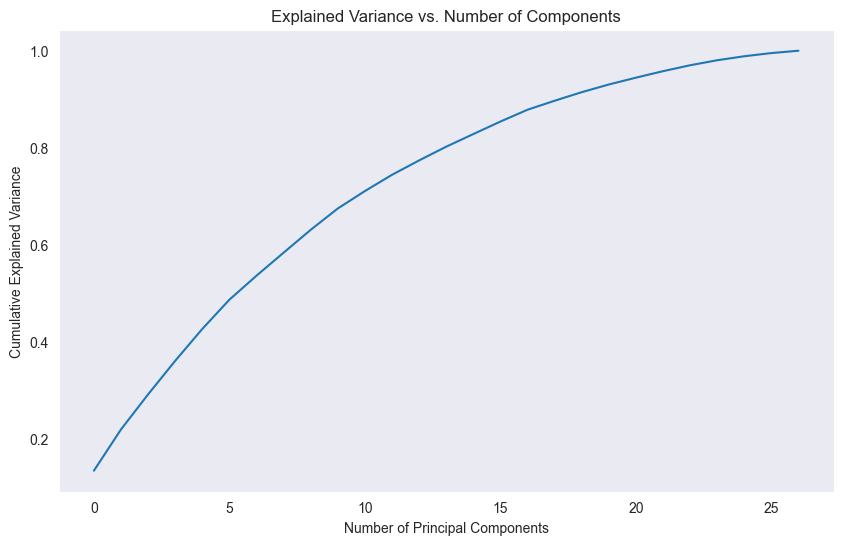

In [27]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train)

explained_variance_ratio = pca.explained_variance_ratio_

plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance_ratio))
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.grid()
plt.show()



In [28]:
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

print("Number of Principal Components:", pca.n_components_)


Number of Principal Components: 22


In [29]:
X_train_pca

array([[-1.62532299,  1.16996718,  0.04544256, ...,  0.74087421,
        -0.981798  ,  0.74767259],
       [ 0.13986774,  0.29653243, -0.11052936, ..., -2.13149547,
        -0.44466934,  0.73145276],
       [-0.34602358,  4.10957387,  0.99677257, ..., -0.36675428,
         1.10686944, -0.3634342 ],
       ...,
       [-0.49024265,  0.02189431,  0.58303274, ...,  0.61661957,
        -0.83509962, -0.67990856],
       [-0.05398435, -0.17954351,  0.57539449, ...,  0.53902338,
        -0.03816964,  0.61020825],
       [-0.57384552, -0.63464449,  0.3294711 , ...,  0.38952036,
        -0.47753726,  0.3605911 ]])

In [30]:
X_train, X_test = X_train_pca, X_test_pca

# Model Training

In [31]:
y_train.value_counts()

y_yes
False    29238
True     29238
Name: count, dtype: int64

In [32]:
y_test.value_counts()

y_yes
False    7310
True      928
Name: count, dtype: int64

## Random Forest

In [34]:
rf = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],            # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],             # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],             # Minimum samples to split a node
    'min_samples_leaf':  [2, 4, 10],               # Minimum samples at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider for the best split
}

stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, cv = stratified_kfold, 
                                   n_iter=20, n_jobs=-1, verbose=2, random_state=42, scoring='recall')
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Parameters from Randomized Search:", best_params)
best_rf = random_search.best_estimator_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


/Users/skc/Desktop/Work/ml-project/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
40 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
13 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/skc/Desktop/Work/ml-project/venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/skc/Desktop/Work/ml-project/venv/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/Users/skc/Desktop/Work/ml-project/venv/lib/python3.12/site-packages/sklearn/base.py", line 666, in

Best Parameters from Randomized Search: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 30}


In [35]:
y_pred = best_rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8895362952172857
Precision: 0.5061898211829436
Recall: 0.7931034482758621
F1 Score: 0.617968094038623
Confusion Matrix:
 [[6592  718]
 [ 192  736]]


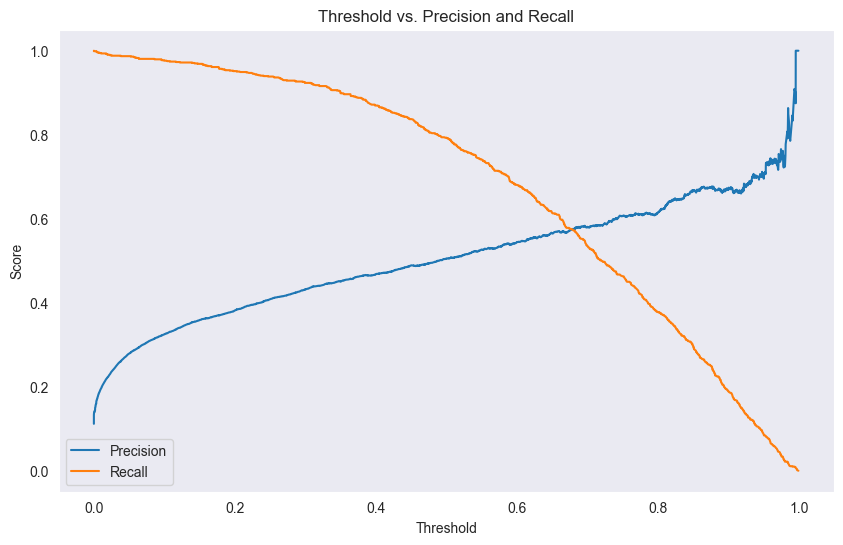

In [36]:
# get the last recall for which the recal is greater than 0.6 
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
# plot threshold vs precision and recall
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold vs. Precision and Recall')
plt.legend()
plt.grid()
plt.show()

In [42]:
# get f1 score
f1 = 2 * (precision * recall) / (precision + recall)
f1_index = np.argmax(f1)
threshold = thresholds[f1_index]
print("Threshold:", threshold)


Threshold: 0.5003637566137565


In [43]:
# Adjust predictions using the new threshold
y_pred_adjusted = (y_pred_proba >= threshold).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred_adjusted))
print("Precision:", precision_score(y_test, y_pred_adjusted))
print("Recall:", recall_score(y_test, y_pred_adjusted))
print("F1 Score:", f1_score(y_test, y_pred_adjusted))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_adjusted))


Accuracy: 0.8895362952172857
Precision: 0.5061898211829436
Recall: 0.7931034482758621
F1 Score: 0.617968094038623
Confusion Matrix:
 [[6592  718]
 [ 192  736]]


In [44]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold

# Define your pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Standardize features
    ('smote', SMOTE(random_state=42)),  # Oversampling
    ('pca', PCA(n_components=0.95)),   # Dimensionality reduction
    ('rf', best_rf)                    # Predefined RandomForest model
])

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
fold_results = []

# Perform cross-validation manually
for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    
    print(f"Fold {fold_idx}...")
    print(f"Train samples: {len(train_idx)}")
    print(f"Test samples: {len(test_idx)}")
    # Split data into train and test for the current fold
    # Split data into train and test for the current fold
    X_train_, X_test_ = X.iloc[train_idx], X.iloc[test_idx]
    y_train_, y_test_ = y.iloc[train_idx], y.iloc[test_idx]

    
    # Fit the pipeline on the training data
    pipeline.fit(X_train_, y_train_)
    
    # Predict on the test data
    y_pred_proba = pipeline.predict_proba(X_test_)[:, 1]
    
    y_pred = (y_pred_proba >= threshold).astype(int)
    
    print("Accuracy:", accuracy_score(y_test_, y_pred))
    print("Precision:", precision_score(y_test_, y_pred))
    print("Recall:", recall_score(y_test_, y_pred))
    print("F1 Score:", f1_score(y_test_, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_, y_pred))
    

Fold 1...
Train samples: 32950
Test samples: 8238
Accuracy: 0.879582422918184
Precision: 0.4777158774373259
Recall: 0.7392241379310345
F1 Score: 0.5803722504230119
Confusion Matrix:
 [[6560  750]
 [ 242  686]]
Fold 2...
Train samples: 32950
Test samples: 8238
Accuracy: 0.8806749210973537
Precision: 0.4808895066018068
Recall: 0.7456896551724138
F1 Score: 0.5847063793831855
Confusion Matrix:
 [[6563  747]
 [ 236  692]]
Fold 3...
Train samples: 32950
Test samples: 8238
Accuracy: 0.8827385287691187
Precision: 0.48695054945054944
Recall: 0.7640086206896551
F1 Score: 0.5947986577181208
Confusion Matrix:
 [[6563  747]
 [ 219  709]]
Fold 4...
Train samples: 32951
Test samples: 8237
Accuracy: 0.8872162194973898
Precision: 0.49964209019327127
Recall: 0.7521551724137931
F1 Score: 0.6004301075268818
Confusion Matrix:
 [[6610  699]
 [ 230  698]]
Fold 5...
Train samples: 32951
Test samples: 8237
Accuracy: 0.8901299016632269
Precision: 0.5082912761355444
Recall: 0.759698275862069
F1 Score: 0.60907127

## Logistic Regression

In [45]:
log_reg = LogisticRegression(random_state=42)

param_dist = {
    'C': np.logspace(-4, 4, 20),            # Regularization strength
    'penalty': ['l2'],                      # Regularization type
    'solver': ['liblinear', 'lbfgs'],       # Solver for optimization
}

random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_dist,
                                   n_iter=20, cv=stratified_kfold, n_jobs=-1,
                                   verbose=2, random_state=42, scoring='recall')

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_lr_model = random_search.best_estimator_

print("Best Parameters from Randomized Search:", best_params)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters from Randomized Search: {'solver': 'lbfgs', 'penalty': 'l2', 'C': np.float64(3792.690190732246)}


In [46]:
y_pred = best_lr_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8589463462005341
Precision: 0.4359255202628697
Recall: 0.8577586206896551
F1 Score: 0.5780682643427741
Confusion Matrix:
 [[6280 1030]
 [ 132  796]]


In [47]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold

# Define your pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Standardize features
    ('smote', SMOTE(random_state=42)),  # Oversampling
    ('pca', PCA(n_components=0.95)),   # Dimensionality reduction
    ('lr',  best_lr_model)                    # Predefined RandomForest model
])

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
fold_results = []

# Perform cross-validation manually
for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    
    print(f"Fold {fold_idx}...")
    print(f"Train samples: {len(train_idx)}")
    print(f"Test samples: {len(test_idx)}")
    # Split data into train and test for the current fold
    # Split data into train and test for the current fold
    X_train_, X_test_ = X.iloc[train_idx], X.iloc[test_idx]
    y_train_, y_test_ = y.iloc[train_idx], y.iloc[test_idx]

    
    # Fit the pipeline on the training data
    pipeline.fit(X_train_, y_train_)
    
    # Predict on the test data
    y_pred = pipeline.predict(X_test_)
    
    
    print("Accuracy:", accuracy_score(y_test_, y_pred))
    print("Precision:", precision_score(y_test_, y_pred))
    print("Recall:", recall_score(y_test_, y_pred))
    print("F1 Score:", f1_score(y_test_, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_, y_pred))


Fold 1...
Train samples: 32950
Test samples: 8238
Accuracy: 0.8566399611556202
Precision: 0.4292901062045836
Recall: 0.8275862068965517
F1 Score: 0.5653294074346706
Confusion Matrix:
 [[6289 1021]
 [ 160  768]]
Fold 2...
Train samples: 32950
Test samples: 8238
Accuracy: 0.8602816217528526
Precision: 0.437883008356546
Recall: 0.8469827586206896
F1 Score: 0.5773044436283511
Confusion Matrix:
 [[6301 1009]
 [ 142  786]]
Fold 3...
Train samples: 32950
Test samples: 8238
Accuracy: 0.8554260742898762
Precision: 0.42794520547945203
Recall: 0.8415948275862069
F1 Score: 0.5673810388666909
Confusion Matrix:
 [[6266 1044]
 [ 147  781]]
Fold 4...
Train samples: 32951
Test samples: 8237
Accuracy: 0.8584436081097487
Precision: 0.4339622641509434
Recall: 0.8426724137931034
F1 Score: 0.5728937728937729
Confusion Matrix:
 [[6289 1020]
 [ 146  782]]
Fold 5...
Train samples: 32951
Test samples: 8237
Accuracy: 0.8594148354983611
Precision: 0.4336027713625866
Recall: 0.8092672413793104
F1 Score: 0.56466165

In [48]:
X_train

array([[-1.62532299,  1.16996718,  0.04544256, ...,  0.74087421,
        -0.981798  ,  0.74767259],
       [ 0.13986774,  0.29653243, -0.11052936, ..., -2.13149547,
        -0.44466934,  0.73145276],
       [-0.34602358,  4.10957387,  0.99677257, ..., -0.36675428,
         1.10686944, -0.3634342 ],
       ...,
       [-0.49024265,  0.02189431,  0.58303274, ...,  0.61661957,
        -0.83509962, -0.67990856],
       [-0.05398435, -0.17954351,  0.57539449, ...,  0.53902338,
        -0.03816964,  0.61020825],
       [-0.57384552, -0.63464449,  0.3294711 , ...,  0.38952036,
        -0.47753726,  0.3605911 ]])

## SVM

In [49]:
svm = SVC(random_state=42)

param_dist = {
    'C': np.logspace(-1, 1, 3),              # Regularization strength; controls the trade-off between misclassification and margin maximization
    'kernel': ['rbf', 'poly'],      # Type of kernel function; linear, radial basis, and polynomial
    'gamma': ['scale', 'auto']                # Kernel coefficient; important for RBF and polynomial kernels
}

random_search = RandomizedSearchCV(estimator=svm, param_distributions=param_dist,
                                   n_iter=10, cv=stratified_kfold, n_jobs=-1,
                                   verbose=2, random_state=42, scoring='recall')

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_svm_model = random_search.best_estimator_

print("Best Parameters from Randomized Search:", best_params)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END ......C=0.615848211066026, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .C=29.763514416313132, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END C=0.0018329807108324356, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ....C=0.03359818286283781, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .......C=206.913808111479, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END ....C=0.23357214690901212, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .............C=0.0001, penalty=l2, so

/Users/skc/Desktop/Work/ml-project/venv/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END C=0.23357214690901212, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END C=0.0006951927961775605, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ......C=3792.690190732246, penalty=l2, solver=lbfgs; total time=   0.1s
[CV] END .....C=29.763514416313132, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ................C=10000.0, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END .....C=11.288378916846883, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=0.004832930238571752, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ...C=1438.44988828766, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END .............C=0.0001, penalty=l2, solver=liblinear; total time=   0.1s
[CV] END ......C=545.5594781168514, penalty=l2, solver=lbfgs; total time=   0.0s
[CV] END ...................C=10.0, gamma=scale, kernel=poly; total time= 1.7min
[CV] END C=0.2335721469090

In [50]:
y_pred = best_svm_model.predict(X_test)


print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8664724447681476
Precision: 0.44806763285024154
Recall: 0.7995689655172413
F1 Score: 0.5743034055727554
Confusion Matrix:
 [[6396  914]
 [ 186  742]]


In [51]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import StratifiedKFold

# Define your pipeline
pipeline = Pipeline([
    ('scaler', StandardScaler()),      # Standardize features
    ('smote', SMOTE(random_state=42)),  # Oversampling
    ('pca', PCA(n_components=0.95)),   # Dimensionality reduction
    ('svm',  best_svm_model)                    # Predefined RandomForest model
])

# Cross-validation setup
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Lists to store metrics for each fold
fold_results = []

# Perform cross-validation manually
for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X, y), 1):
    
    print(f"Fold {fold_idx}...")
    print(f"Train samples: {len(train_idx)}")
    print(f"Test samples: {len(test_idx)}")
    
    X_train_, X_test_ = X.iloc[train_idx], X.iloc[test_idx]
    y_train_, y_test_ = y.iloc[train_idx], y.iloc[test_idx]

    
    # Fit the pipeline on the training data
    pipeline.fit(X_train_, y_train_)
    
    # Predict on the test data
    y_pred = pipeline.predict(X_test_)
    
    
    print("Accuracy:", accuracy_score(y_test_, y_pred))
    print("Precision:", precision_score(y_test_, y_pred))
    print("Recall:", recall_score(y_test_, y_pred))
    print("F1 Score:", f1_score(y_test_, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test_, y_pred))



Fold 1...
Train samples: 32950
Test samples: 8238
Accuracy: 0.8619810633648944
Precision: 0.4373125374925015
Recall: 0.7855603448275862
F1 Score: 0.561849710982659
Confusion Matrix:
 [[6372  938]
 [ 199  729]]
Fold 2...
Train samples: 32950
Test samples: 8238
Accuracy: 0.8614955086185967
Precision: 0.43502135448444174
Recall: 0.7683189655172413
F1 Score: 0.555512271133619
Confusion Matrix:
 [[6384  926]
 [ 215  713]]
Fold 3...
Train samples: 32950
Test samples: 8238
Accuracy: 0.8663510560815731
Precision: 0.4472882388787325
Recall: 0.790948275862069
F1 Score: 0.5714285714285714
Confusion Matrix:
 [[6403  907]
 [ 194  734]]
Fold 4...
Train samples: 32951
Test samples: 8237
Accuracy: 0.8685200922666019
Precision: 0.4517734909769757
Recall: 0.7823275862068966
F1 Score: 0.5727810650887574
Confusion Matrix:
 [[6428  881]
 [ 202  726]]
Fold 5...
Train samples: 32951
Test samples: 8237
Accuracy: 0.8726478086682045
Precision: 0.46119307248236047
Recall: 0.7747844827586207
F1 Score: 0.578206674